In [ ]:
pip install xgboost

In [ ]:
pip install yellowbrick

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import xgboost as xgb

In [ ]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,log_loss,roc_curve, roc_auc_score,cohen_kappa_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # For Plotting Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier, VotingClassifier

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from scipy.spatial.distance import pdist
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,log_loss,roc_curve, roc_auc_score,cohen_kappa_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # For Plotting Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
pd.set_option('display.max_columns', None)

# Problem Statement

> Unsupervsed Learning


In [ ]:
ps = pd.read_csv(r'/content/online_shoppers_intention.csv')

## **`Data Understanding`**

In [ ]:
ps.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
ps.shape

(12330, 18)

In [ ]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
ps.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
ps['Revenue'].value_counts(normalize=True)*100

False    84.525547
True     15.474453
Name: Revenue, dtype: float64

# Data Glossary

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.

For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Data Prepration

In [ ]:
ps.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
ps.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
ps.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
num = ps[['Administrative_Duration','Informational_Duration','BounceRates','ExitRates','ProductRelated_Duration','PageValues','SpecialDay']].columns.to_list()

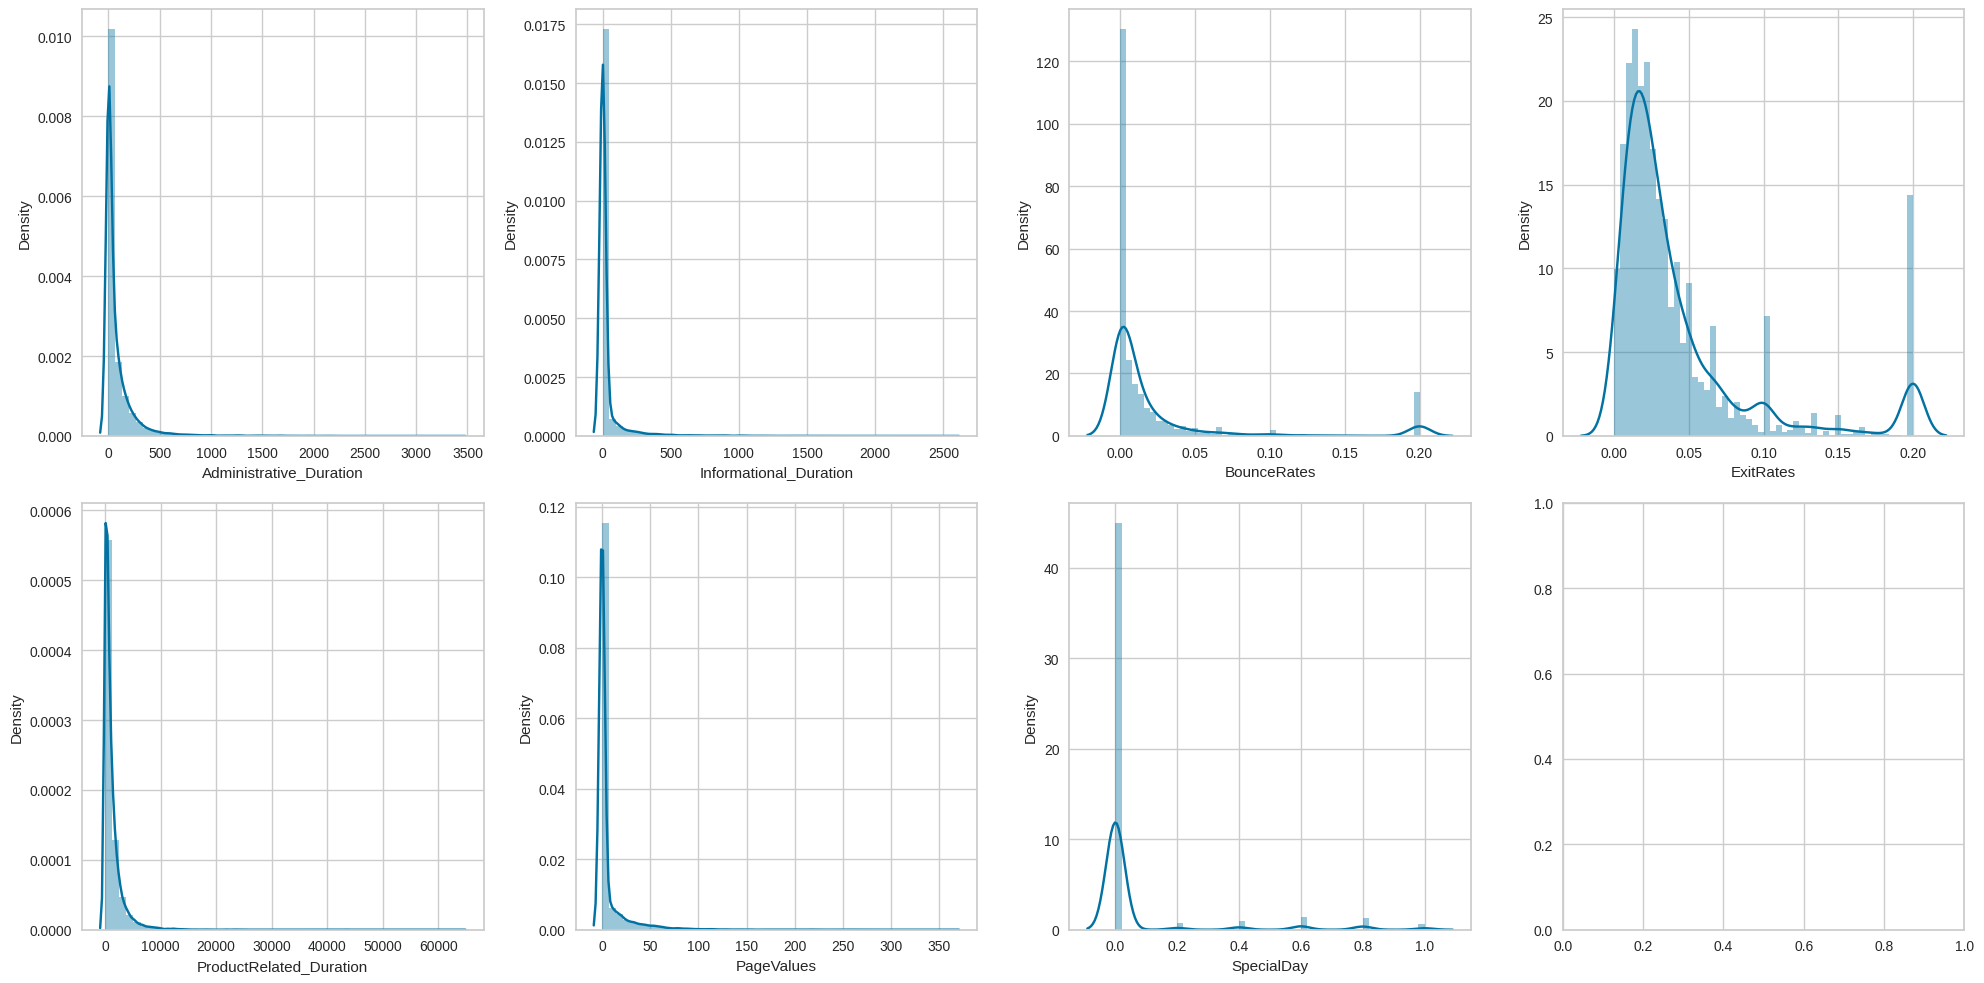

In [ ]:
fig, ax= plt.subplots(2,4, figsize=(20,10))

for i, subplot in zip(num, ax.flatten()):
    sns.distplot(ps[i], ax=subplot,kde=True)
plt.tight_layout()
plt.show()

# To Change the Data type whcih are Pre Encoded.

In [ ]:
le = LabelEncoder ()

In [ ]:
ps['Revenue'] = le.fit_transform(ps['Revenue'])

In [ ]:
ps['Month'] = le.fit_transform(ps['Month'])

In [ ]:
ps = pd.get_dummies(ps,columns=['VisitorType','Weekend'])

In [ ]:
ps.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,0,0,1,0,1


In [ ]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Month                          12330 non-null  int64  
 11  OperatingSystems               12330 non-null  int64  
 12  Browser                        12330 non-null 

# Taking the Copy of the Data so we Train the Data with USL and SLC Concept and Test the Peformance with train

> In Train We Remove the Orginal Target Varaible & Create Cluster Target Variables Using K Means and Hireachry Cluster

> In Test We only keep the orginal Target Varaible

> Post Base Model Building we Compare the Perfomance of Test and Train Dataset to Understand the how the Model is Performaing Based on th result we will Now Move Supervised Method to increase or Decrease the Performances

In [ ]:
ps_train = ps.copy()

In [ ]:
ps_test = ps['Revenue']

In [ ]:
per_train = ps.copy()

In [ ]:
ps_train.drop('Revenue',1,inplace=True)

In [ ]:
ps_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,0,1,0,1


In [ ]:
ps_test.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

## **Model** **Building** **Clusters**

# Transforming The Numerical Varaibles

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer()
for i in num:
    ps_train[i] = pt.fit_transform(ps_train[[i]])

In [ ]:
ps_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,-0.996659,0,-0.491697,1,-2.096783,2.206432,1.982547,-0.529409,-0.33602,2,1,1,1,1,0,0,1,1,0
1,0,-0.996659,0,-0.491697,2,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,2,2,2,1,2,0,0,1,1,0
2,0,-0.996659,0,-0.491697,1,-2.096783,2.206432,1.982547,-0.529409,-0.33602,2,4,1,9,3,0,0,1,1,0
3,0,-0.996659,0,-0.491697,2,-1.875436,1.709303,1.832073,-0.529409,-0.33602,2,3,2,2,4,0,0,1,1,0
4,0,-0.996659,0,-0.491697,10,0.057515,0.756734,0.722460,-0.529409,-0.33602,2,3,3,1,4,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,1.126581,0,-0.491697,53,0.811465,-0.106534,-0.009450,1.930441,-0.33602,1,4,6,1,1,0,0,1,0,1
12326,0,-0.996659,0,-0.491697,5,-0.126425,-0.799209,-0.374701,-0.529409,-0.33602,7,3,2,1,8,0,0,1,0,1
12327,0,-0.996659,0,-0.491697,6,-0.623972,2.051336,1.422627,-0.529409,-0.33602,7,3,2,1,13,0,0,1,0,1
12328,4,0.907532,0,-0.491697,15,-0.297654,-0.799209,-0.389234,-0.529409,-0.33602,7,2,2,3,11,0,0,1,1,0


In [ ]:
ps_train.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
Month                              int64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
VisitorType_New_Visitor            uint8
VisitorType_Other                  uint8
VisitorType_Returning_Visitor      uint8
Weekend_False                      uint8
Weekend_True                       uint8
dtype: object

# Kmeans Model building

In [ ]:
err = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(ps_train)
    err.append(km.inertia_)

In [ ]:
err

[25024065.32806158,
 10647709.10058397,
 5906004.7320177015,
 3784177.908620882,
 2736215.065956177,
 2124181.124796724,
 1742391.7713913496,
 1488187.181321813,
 1296007.2074089574,
 1154807.2818893082]

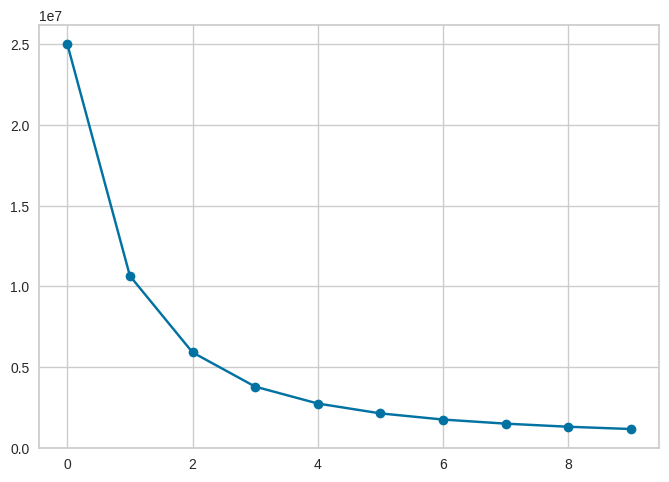

In [ ]:
plt.plot(err, marker='o')
plt.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.metrics.cluster import silhouette_score

Silhouette score for  2 clusters is 0.7633752706608177


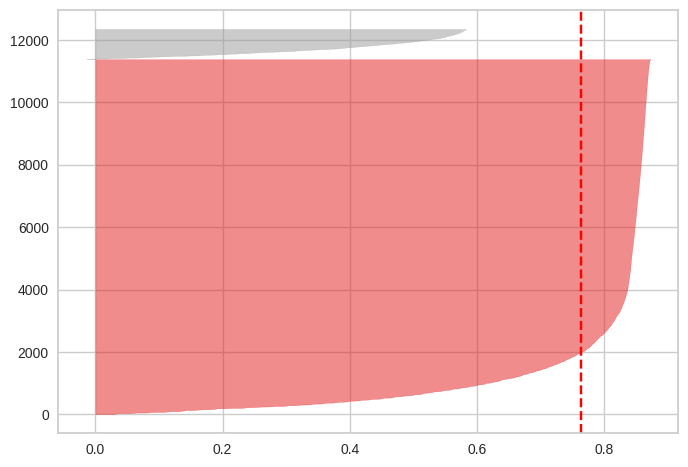

Silhouette score for  3 clusters is 0.6692269061172128


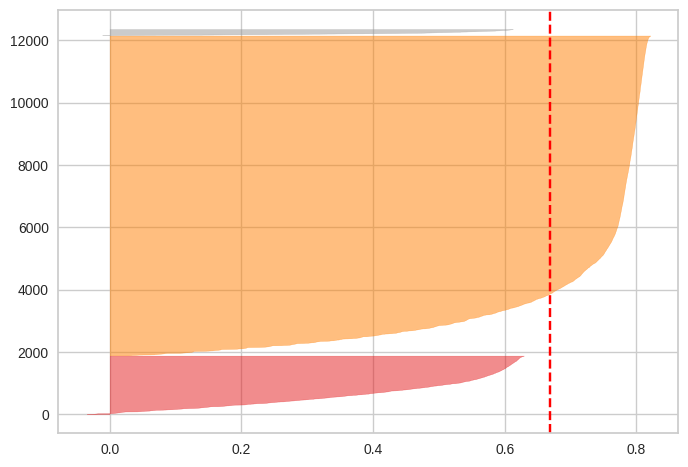

Silhouette score for  4 clusters is 0.5784018681522965


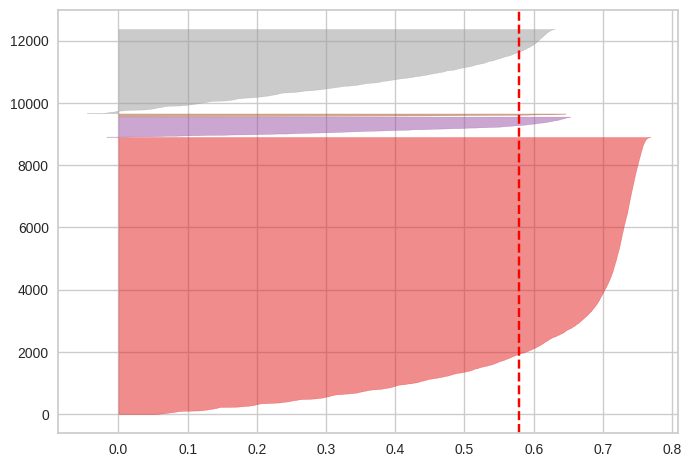

Silhouette score for  5 clusters is 0.5077138169166161


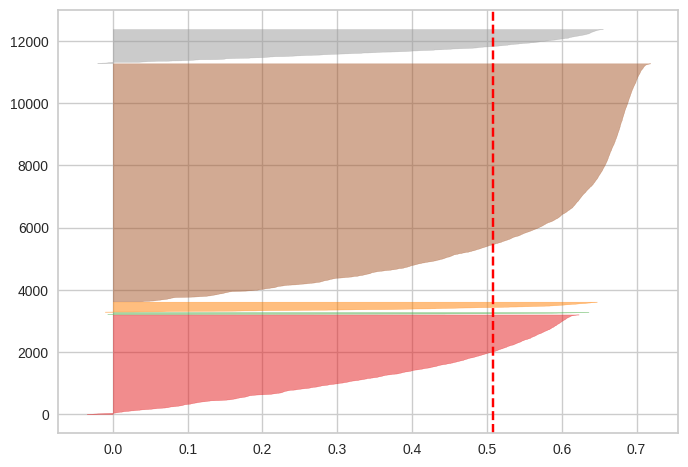

In [ ]:
for i in range(2,6):
  km = KMeans(n_clusters = i)
  km.fit(ps_train)
  sil_score = silhouette_score(ps_train,km.labels_)
  print('Silhouette score for ',i,'clusters is',sil_score)
  sil_km = SilhouetteVisualizer(km)
  sil_km.fit(ps_train)
  plt.show()

> We  Build a Elow Plot & Silhouette Plot and Identify How Many Cluster we Have to Create Using K Means

> From the Plots We Have Decided It is 2 Cluster without any PCA

> Now We build a K Means Model with Train and Add the Labels in Train Data


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=2,random_state =3)

In [ ]:
model_km_NPCA = km.fit(ps_train)

In [ ]:
len(model_km_NPCA.labels_)

12330

In [ ]:
per_train['Kmeans_Cluster'] = model_km_NPCA.labels_

In [ ]:
per_train['Kmeans_Cluster'].value_counts()

0    11343
1      987
Name: Kmeans_Cluster, dtype: int64

In [ ]:
from scipy.cluster.hierarchy import dendrogram,cophenet,linkage

In [ ]:
from scipy.spatial.distance import pdist

In [ ]:
met =  ['single','complete','average','ward']
for i in met:
    Z = linkage(ps_train,method=i)
    c, coph_dist = cophenet(Z,pdist(ps_train))
    print('method is, ', i, c)

method is,  single 0.7052285341326209
method is,  complete 0.9254747387216006
method is,  average 0.906502271653793
method is,  ward 0.7131348458208686


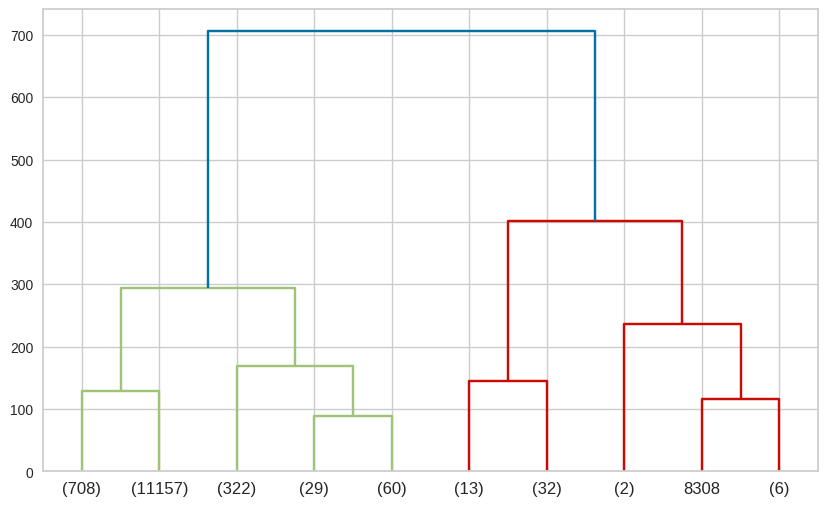

In [ ]:
plt.figure(figsize = (10,6))
z = linkage(ps_train,method = 'complete')
dendrogram(z,truncate_mode = 'lastp',p=10)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model_agc_NPCA = AgglomerativeClustering(n_clusters=2,linkage = 'complete')
model_agc_NPCA.fit(ps_train)

AgglomerativeClustering(linkage='complete')

In [ ]:
model_agc_NPCA.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
per_train['Hierarchy_Cluster'] = model_agc_NPCA.labels_

In [ ]:
per_train['Hierarchy_Cluster'].value_counts()

1    12276
0       54
Name: Hierarchy_Cluster, dtype: int64

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbs = DBSCAN(eps=1,min_samples=12)

In [ ]:
model_DBS_NPCA = dbs.fit(ps_train)

In [ ]:
per_train['DBSCAN_Cluster'] = model_DBS_NPCA.labels_

In [ ]:
per_train['DBSCAN_Cluster'].value_counts()

-1    12242
 0       75
 1       13
Name: DBSCAN_Cluster, dtype: int64

In [ ]:
per_train.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Kmeans_Cluster,Hierarchy_Cluster,DBSCAN_Cluster
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,0,0,0,1,1,0,0,1,-1
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,0,0,0,1,1,0,0,1,-1


<Axes: xlabel='Informational_Duration', ylabel='ProductRelated_Duration'>

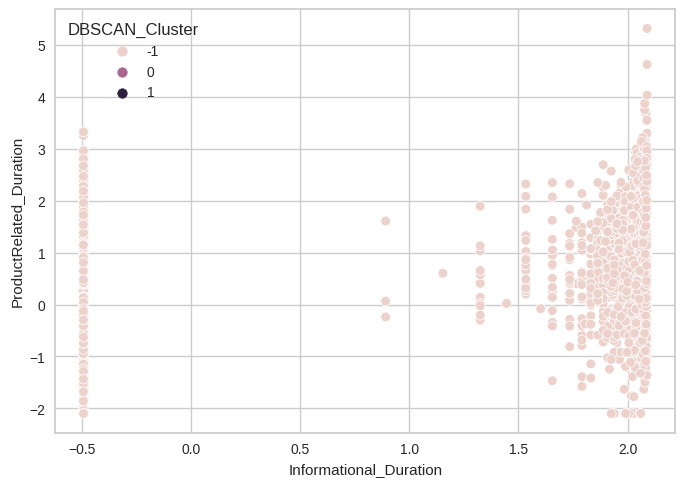

In [ ]:
sns.scatterplot(data=ps_train,x='Informational_Duration',y='ProductRelated_Duration',hue=per_train['DBSCAN_Cluster'])

# **Def Fuction to Store the Result**

In [ ]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1 Score", "TN", "FN", "FP", "TP"])

def per_measures(model, test, pred):
    accuracy = accuracy_score(test, pred)
    f1score = f1_score(test, pred, average='weighted')  # Set average to 'weighted'
    recall = recall_score(test, pred, average='weighted')  # Set average to 'weighted'
    precision = precision_score(test, pred, average='weighted')  # Set average to 'weighted'
    cm = confusion_matrix(test, pred)

    # Extract values from the confusion matrix for each class
    tn = cm[0, 0]
    fn = cm[1, 0]
    fp = cm[0, 1]
    tp = cm[1, 1]

    return accuracy, recall, precision, f1score, tn, fn, fp, tp

def update_performance(name, model, test, pred):
    global perf_score
    accuracy, recall, precision, f1score, tn, fn, fp, tp = per_measures(model, test, pred)
    perf_score = perf_score.append({'Model': name,
                                    'Accuracy': accuracy,
                                    'Recall': recall,
                                    'Precision': precision,
                                    'F1 Score': f1score,
                                    'TN': tn,
                                    'FN': fn,
                                    'FP': fp,
                                    'TP': tp},
                                   ignore_index=True)

## PCA  

In [ ]:
PCA_train = ps_train.copy()

In [ ]:
c = np.cov(PCA_train.T)

In [ ]:
eigval,eigvect = np.linalg.eig(c)

In [ ]:
eigval

array([ 1.98135173e+03,  1.63171797e+01,  9.87224898e+00,  5.45056479e+00,
        5.93813316e+00,  2.89334989e+00,  1.81652584e+00,  1.74868385e+00,
        9.46517113e-01,  8.18080018e-01,  7.52028455e-01,  4.20572687e-01,
        3.55097543e-01,  3.41363012e-01,  2.65920384e-01,  2.27388369e-01,
        1.67940732e-01,  8.08110973e-03, -1.45247440e-18, -8.23159120e-17])

In [ ]:
eigvect

array([[ 3.23437434e-02,  3.77967562e-02, -9.44294982e-01,
         4.70291923e-02,  1.37843642e-03,  9.33979182e-03,
         2.09477792e-01, -1.22166444e-01,  1.67975687e-03,
         4.97342835e-02, -3.91932652e-03, -1.13570335e-01,
        -6.79218624e-02, -1.43259681e-01, -2.12264371e-02,
        -5.97526217e-02,  1.33502476e-02, -1.64531972e-04,
        -8.88150471e-18,  2.92456229e-18],
       [ 7.34803096e-03,  1.36435133e-02, -2.32240635e-01,
         1.35281377e-03, -4.36048820e-03,  5.04077429e-03,
        -2.94278848e-02,  1.38133418e-01, -8.07672519e-03,
        -6.57706585e-03, -1.55463810e-03,  5.18260078e-01,
         3.10034641e-01,  6.44852754e-01,  1.01067835e-01,
         3.65346215e-01, -3.84261658e-02,  9.73960052e-04,
         8.41243877e-18,  3.56704224e-17],
       [ 1.07047820e-02,  9.94503831e-03, -1.18874649e-01,
         2.04536387e-02,  8.09720366e-03, -4.24636922e-02,
        -7.40174999e-01, -2.81138612e-01,  1.19249744e-02,
         9.42974484e-02, -1.1

In [ ]:
var_exp = eigval/sum(eigval)*100
var_exp

array([ 9.76183731e+01,  8.03924165e-01,  4.86391624e-01,  2.68541552e-01,
        2.92563350e-01,  1.42551222e-01,  8.94976365e-02,  8.61551589e-02,
        4.66335479e-02,  4.03056354e-02,  3.70513692e-02,  2.07210163e-02,
        1.74951494e-02,  1.68184686e-02,  1.31015180e-02,  1.12031005e-02,
        8.27420028e-03,  3.98144748e-04, -7.15613415e-20, -4.05558756e-18])

In [ ]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 97.61837314,  98.42229731,  98.90868893,  99.17723048,
        99.46979383,  99.61234505,  99.70184269,  99.78799785,
        99.8346314 ,  99.87493703,  99.9119884 ,  99.93270942,
        99.95020457,  99.96702304,  99.98012455,  99.99132765,
        99.99960186, 100.        , 100.        , 100.        ])

In [ ]:
pc = PCA_train.dot(eigvect)

In [ ]:
pc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.932198,-1.356166,0.655341,-2.094001,0.139197,0.759624,1.310771,-3.319750,1.217233,-0.234544,0.685262,-0.967384,-0.388320,0.514659,0.012524,-0.180133,-0.732676,-0.453161,0.736313,-0.773015
1,1.956203,-2.366615,0.381927,-2.084012,-0.076973,2.038996,0.596164,-1.100176,0.765878,0.600135,1.468744,-1.689391,-0.862337,-0.013688,-0.035651,1.203341,-0.007187,-0.505064,0.736313,-0.773015
2,0.908090,-3.830300,0.344371,-6.304420,-6.558073,-0.037561,1.266602,-3.497360,1.222657,-0.114661,3.420093,-1.096103,-0.423877,0.549871,0.029925,-0.115956,-0.745138,-0.571398,0.736313,-0.773015
3,1.923410,-4.521189,0.486323,-2.480034,-0.849837,1.728100,1.118121,-2.945802,1.180677,0.000665,2.386372,-1.101153,-0.479168,0.442275,0.014854,0.044734,-0.639216,-0.537444,0.736313,-0.773015
4,9.960481,-4.516533,0.549746,-1.988237,-0.216132,2.957248,0.536907,-1.314875,0.832306,0.301446,2.363786,-0.175605,0.125138,-1.130729,0.339964,0.140332,-0.321380,-0.532362,0.736313,-0.773015


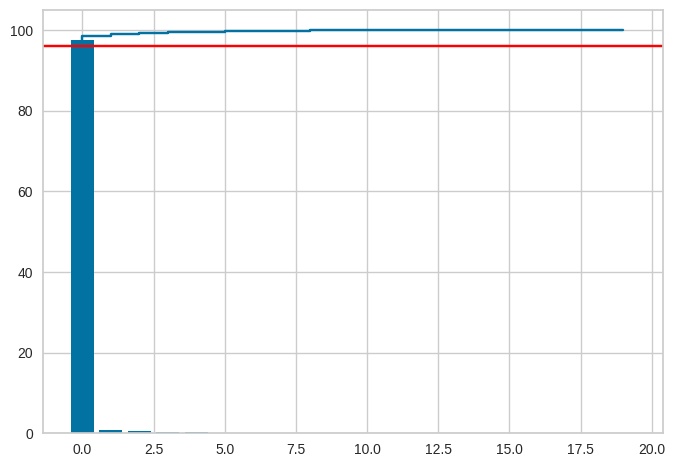

In [ ]:
plt.bar(range(0,20),var_exp)
plt.step(range(0,20),cum_var_exp)
plt.axhline(96,c = 'red')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
my_pca = PCA(n_components = 0.98)
pca2 = my_pca.fit_transform(PCA_train)
pca_df = pd.DataFrame(pca2)
pca_df.head()

,0,1
0,-30.849671,-3.347020
1,-29.825667,-2.336570
2,-30.873780,-0.872885
3,-29.858460,-0.181997
4,-21.821389,-0.186652


In [ ]:
err = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(pca_df)
    err.append(km.inertia_)

In [ ]:
err

[24629259.97567516,
 10253063.557084123,
 5513856.161761766,
 3394975.4997817203,
 2349157.3339457326,
 1739429.0799420625,
 1359550.759019071,
 1103734.9439547174,
 910547.9164042892,
 772702.4349374583]

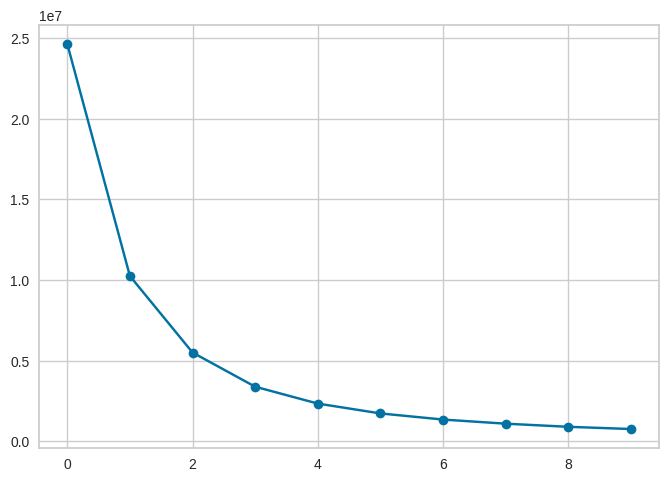

In [ ]:
plt.plot(err,marker='o')
plt.show()

In [ ]:
km = KMeans(n_clusters=2)
km.fit(pca_df)

KMeans(n_clusters=2)

In [ ]:
pca_df['label'] = km.labels_

In [ ]:
pca_df['label'].value_counts()

0    11371
1      959
Name: label, dtype: int64

In [ ]:
met =  ['single','complete','average','ward']
for i in met:
    Z = linkage(ps_train,method=i)
    c, coph_dist = cophenet(Z,pdist(pca_df.iloc[:,:2]))
    print('method is, ', i, c)

method is,  single 0.6980156012604986
method is,  complete 0.9252629902991799
method is,  average 0.9071869685432229
method is,  ward 0.721012895503747


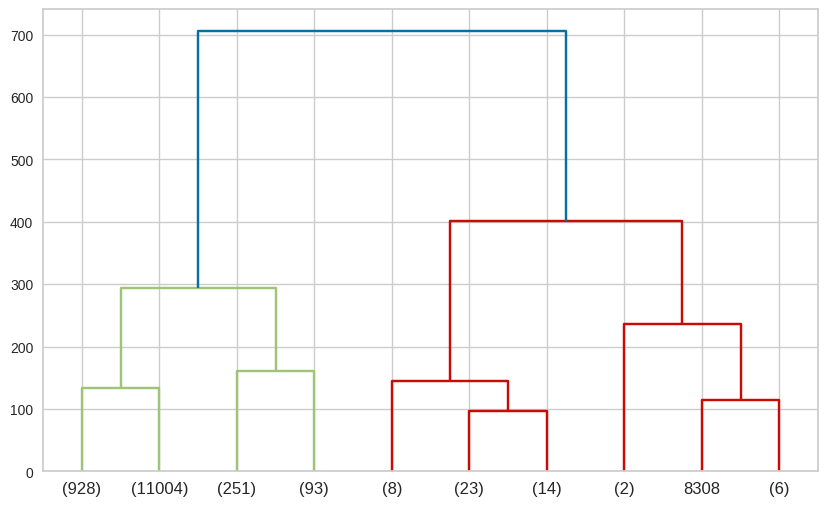

In [ ]:
plt.figure(figsize = (10,6))
z = linkage(pca_df.iloc[:,:2],method = 'complete')
dendrogram(z,truncate_mode = 'lastp',p=10)
plt.show()

In [ ]:
model_agc_PCA = AgglomerativeClustering(n_clusters=2,linkage = 'complete')
model_agc_PCA.fit(pca_df.iloc[:,:2])

AgglomerativeClustering(linkage='complete')

In [ ]:
pca_df['Hierarchy_Cluster'] = model_agc_PCA.labels_

In [ ]:
pca_df.rename(columns={'label':'Kmeans_cluster'},inplace= True)

In [ ]:
pca_df.head()

,0,1,Kmeans_cluster,Hierarchy_Cluster
0,-30.849671,-3.347020,0,1
1,-29.825667,-2.336570,0,1
2,-30.873780,-0.872885,0,1
3,-29.858460,-0.181997,0,1
4,-21.821389,-0.186652,0,1


In [ ]:
pca_df['Hierarchy_Cluster'].value_counts()

1    12276
0       54
Name: Hierarchy_Cluster, dtype: int64

In [ ]:
dbs = DBSCAN(eps=4,min_samples=12)

In [ ]:
model_DBS_PCA = dbs.fit(pca_df.iloc[:,:2])

In [ ]:
pca_df['DBSCAN_Cluster'] = model_DBS_PCA.labels_

In [ ]:
pca_df['DBSCAN_Cluster'].value_counts()

 0    12114
-1      187
 1       29
Name: DBSCAN_Cluster, dtype: int64

<Axes: xlabel='0', ylabel='1'>

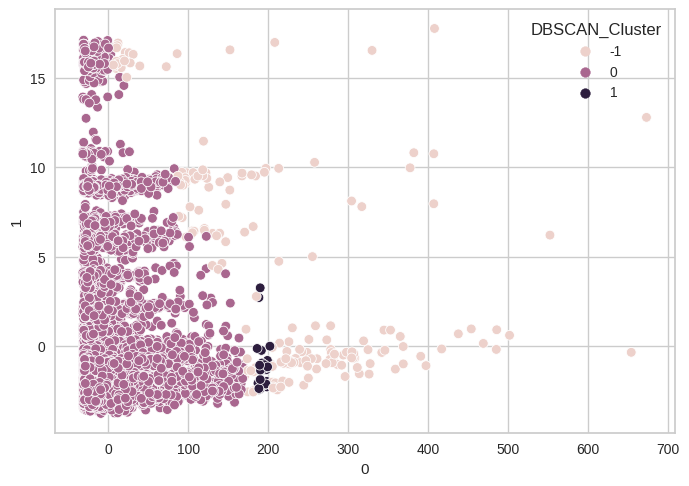

In [ ]:
sns.scatterplot(data=pca_df,x=0,y=1,hue=pca_df['DBSCAN_Cluster'])

## Model Building Logistic Regression

In [ ]:
# Display All the Available  Dataset

In [ ]:
ps_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,-0.996659,0,-0.491697,1,-2.096783,2.206432,1.982547,-0.529409,-0.33602,2,1,1,1,1,0,0,1,1,0
1,0,-0.996659,0,-0.491697,2,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,2,2,2,1,2,0,0,1,1,0
2,0,-0.996659,0,-0.491697,1,-2.096783,2.206432,1.982547,-0.529409,-0.33602,2,4,1,9,3,0,0,1,1,0
3,0,-0.996659,0,-0.491697,2,-1.875436,1.709303,1.832073,-0.529409,-0.33602,2,3,2,2,4,0,0,1,1,0
4,0,-0.996659,0,-0.491697,10,0.057515,0.756734,0.722460,-0.529409,-0.33602,2,3,3,1,4,0,0,1,0,1


In [ ]:
ps_test.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

In [ ]:
per_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Kmeans_Cluster,Hierarchy_Cluster,DBSCAN_Cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,1,1,0,0,1,-1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,1,1,0,0,1,-1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,1,1,0,0,1,-1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,1,1,0,0,1,-1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,0,0,1,0,1,0,1,-1


In [ ]:
per_train.drop('Revenue',1,inplace=True)

In [ ]:
pca_df.head()

,0,1,Kmeans_cluster,Hierarchy_Cluster,DBSCAN_Cluster
0,-30.849671,-3.347020,0,1,0
1,-29.825667,-2.336570,0,1,0
2,-30.873780,-0.872885,0,1,0
3,-29.858460,-0.181997,0,1,0
4,-21.821389,-0.186652,0,1,0


# LR With No PCA

In [ ]:
LR = LogisticRegression()

In [ ]:
xlr = ps_train
ylr = per_train['Kmeans_Cluster']

In [ ]:
model_LR = LR.fit(xlr,ylr)

In [ ]:
ypred_test_LR = model_LR.predict(xlr)

In [ ]:
print(classification_report(ps_test,ypred_test_LR))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10422
           1       0.28      0.15      0.19      1908

    accuracy                           0.81     12330
   macro avg       0.57      0.54      0.54     12330
weighted avg       0.77      0.81      0.78     12330



In [ ]:
update_performance(name='Logistic Regression NPCA Kmeans Vs OG', model=model_LR,test=ps_test,pred=ypred_test_LR)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278


In [ ]:
xlr = ps_train
ylr = per_train['Hierarchy_Cluster']

In [ ]:
model_LR = LR.fit(xlr,ylr)

In [ ]:
ypred_test_LR = model_LR.predict(xlr)

In [ ]:
print(classification_report(ps_test,ypred_test_LR))

              precision    recall  f1-score   support

           0       0.66      0.00      0.01     10422
           1       0.15      0.99      0.27      1908

    accuracy                           0.16     12330
   macro avg       0.41      0.50      0.14     12330
weighted avg       0.58      0.16      0.05     12330



In [ ]:
update_performance(name='Logistic Regression NPCA Hierarchy Vs OG', model=model_LR,test=ps_test,pred=ypred_test_LR)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890


# KNN With No PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
xknn = ps_train
yknn = per_train['Kmeans_Cluster']

In [ ]:
knn = KNeighborsClassifier()
model_kn = knn.fit(xknn,yknn)

In [ ]:
ypred_test_knn = model_kn.predict(xknn)

In [ ]:
print(classification_report(ps_test,ypred_test_knn))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10422
           1       0.29      0.15      0.20      1908

    accuracy                           0.81     12330
   macro avg       0.57      0.54      0.54     12330
weighted avg       0.77      0.81      0.79     12330



In [ ]:
update_performance(name='KNN NPCA Kmeans Vs OG', model=model_kn,test=ps_test,pred=ypred_test_knn)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284


In [ ]:
xknn = ps_train
yknn = per_train['Hierarchy_Cluster']

In [ ]:
knn = KNeighborsClassifier()
model_kn = knn.fit(xknn,yknn)

In [ ]:
ypred_test_knn = model_kn.predict(xknn)

In [ ]:
print(classification_report(ps_test,ypred_test_knn))

              precision    recall  f1-score   support

           0       0.61      0.00      0.01     10422
           1       0.15      0.99      0.27      1908

    accuracy                           0.16     12330
   macro avg       0.38      0.50      0.14     12330
weighted avg       0.54      0.16      0.05     12330



In [ ]:
update_performance(name='KNN NPCA Hierarchy Vs OG', model=model_kn,test=ps_test,pred=ypred_test_knn)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


# Decision Tree With No PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
xdt = ps_train
ydt = per_train['Kmeans_Cluster']

In [ ]:
dc = DecisionTreeClassifier()
model_dc = dc.fit(xdt,ydt)
ypred_test_dc = model_dc.predict(xdt)

In [ ]:
print(classification_report(ps_test,ypred_test_dc))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10422
           1       0.29      0.15      0.20      1908

    accuracy                           0.81     12330
   macro avg       0.57      0.54      0.55     12330
weighted avg       0.77      0.81      0.79     12330



In [ ]:
update_performance(name='Decision Tree NPCA Kmeans Vs OG', model=model_dc,test=ps_test,pred=ypred_test_dc)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285


In [ ]:
xdt = ps_train
ydt = per_train['Hierarchy_Cluster']

In [ ]:
dc = DecisionTreeClassifier()
model_dc = dc.fit(xdt,ydt)
ypred_test_dc = model_dc.predict(xdt)

In [ ]:
print(classification_report(ps_test,ypred_test_dc))

              precision    recall  f1-score   support

           0       0.61      0.00      0.01     10422
           1       0.15      0.99      0.27      1908

    accuracy                           0.16     12330
   macro avg       0.38      0.50      0.14     12330
weighted avg       0.54      0.16      0.05     12330



In [ ]:
update_performance(name='Decision Tree NPCA Hierarchy Vs OG', model=model_dc,test=ps_test,pred=ypred_test_dc)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


# Naive Bayes With No PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
xnb = ps_train
ynb = per_train['Kmeans_Cluster']

In [ ]:
nb = GaussianNB()
model_nb = nb.fit(xnb,ynb)
ypred_test_nb = model_nb.predict(xnb)

In [ ]:
print(classification_report(ps_test,ypred_test_nb))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     10422
           1       0.28      0.35      0.31      1908

    accuracy                           0.76     12330
   macro avg       0.58      0.59      0.58     12330
weighted avg       0.78      0.76      0.77     12330



In [ ]:
update_performance(name='Naive Bayers NPCA Kmeans Vs OG', model=model_nb,test=ps_test,pred=ypred_test_nb)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667


In [ ]:
xnb = ps_train
ynb = per_train['Hierarchy_Cluster']

In [ ]:
nb = GaussianNB()
model_nb = nb.fit(xnb,ynb)
ypred_test_nb = model_nb.predict(xnb)

In [ ]:
print(classification_report(ps_test,ypred_test_nb))

              precision    recall  f1-score   support

           0       0.68      0.09      0.16     10422
           1       0.13      0.77      0.23      1908

    accuracy                           0.20     12330
   macro avg       0.41      0.43      0.19     12330
weighted avg       0.60      0.20      0.17     12330



In [ ]:
update_performance(name='Naive Bayers NPCA Hierarchy Vs OG', model=model_nb,test=ps_test,pred=ypred_test_nb)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474


# Random Forest With No PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
xrf = ps_train
yrf = per_train['Kmeans_Cluster']

In [ ]:
rf = RandomForestClassifier()
model_rf = rf.fit(xnb,ynb)
ypred_test_rf = model_rf.predict(xnb)

In [ ]:
print(classification_report(ps_test,ypred_test_rf))

              precision    recall  f1-score   support

           0       0.61      0.00      0.01     10422
           1       0.15      0.99      0.27      1908

    accuracy                           0.16     12330
   macro avg       0.38      0.50      0.14     12330
weighted avg       0.54      0.16      0.05     12330



In [ ]:
update_performance(name='Random forest NPCA Kmeans Vs OG', model=model_rf,test=ps_test,pred=ypred_test_rf)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


In [ ]:
xrf = ps_train
yrf = per_train['Hierarchy_Cluster']

In [ ]:
rf = RandomForestClassifier()
model_rf = rf.fit(xnb,ynb)
ypred_test_rf = model_rf.predict(xnb)

In [ ]:
print(classification_report(ps_test,ypred_test_rf))

              precision    recall  f1-score   support

           0       0.61      0.00      0.01     10422
           1       0.15      0.99      0.27      1908

    accuracy                           0.16     12330
   macro avg       0.38      0.50      0.14     12330
weighted avg       0.54      0.16      0.05     12330



In [ ]:
update_performance(name='Random forest NPCA Hierarchy Vs OG', model=model_rf,test=ps_test,pred=ypred_test_rf)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
9,Random forest NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


# LR With PCA

In [ ]:
LR = LogisticRegression()

In [ ]:
pca_df.head()

,0,1,Kmeans_cluster,Hierarchy_Cluster,DBSCAN_Cluster
0,-30.849671,-3.347020,0,1,0
1,-29.825667,-2.336570,0,1,0
2,-30.873780,-0.872885,0,1,0
3,-29.858460,-0.181997,0,1,0
4,-21.821389,-0.186652,0,1,0


In [ ]:
xlr = pca_df.iloc[:,:2]
ylr = pca_df['Kmeans_cluster']

In [ ]:
model_LR = LR.fit(xlr,ylr)

In [ ]:
ypred_test_LR = model_LR.predict(xlr)

In [ ]:
print(classification_report(ps_test,ypred_test_LR))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10422
           1       0.29      0.15      0.19      1908

    accuracy                           0.81     12330
   macro avg       0.57      0.54      0.54     12330
weighted avg       0.77      0.81      0.79     12330



In [ ]:
update_performance(name='Logistic Regression PCA Kmeans Vs OG', model=model_LR,test=ps_test,pred=ypred_test_LR)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
9,Random forest NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


In [ ]:
xlr = pca_df.iloc[:,:2]
ylr = pca_df['Hierarchy_Cluster']

In [ ]:
model_LR = LR.fit(xlr,ylr)

In [ ]:
ypred_test_LR = model_LR.predict(xlr)

In [ ]:
print(classification_report(ps_test,ypred_test_LR))

              precision    recall  f1-score   support

           0       0.61      0.00      0.01     10422
           1       0.15      0.99      0.27      1908

    accuracy                           0.16     12330
   macro avg       0.38      0.50      0.14     12330
weighted avg       0.54      0.16      0.05     12330



In [ ]:
update_performance(name='Logistic Regression PCA Hierarchy Vs OG', model=model_LR,test=ps_test,pred=ypred_test_LR)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
9,Random forest NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


# KNN With PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
xknn = pca_df.iloc[:,:2]
yknn = pca_df['Kmeans_cluster']

In [ ]:
knn = KNeighborsClassifier()
model_kn = knn.fit(xknn,yknn)

In [ ]:
ypred_test_knn = model_kn.predict(xknn)

In [ ]:
print(classification_report(ps_test,ypred_test_knn))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10422
           1       0.29      0.15      0.19      1908

    accuracy                           0.81     12330
   macro avg       0.57      0.54      0.54     12330
weighted avg       0.77      0.81      0.79     12330



In [ ]:
update_performance(name='KNN PCA Kmeans Vs OG', model=model_kn,test=ps_test,pred=ypred_test_knn)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
9,Random forest NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


In [ ]:
xknn = pca_df.iloc[:,:2]
yknn = pca_df['Hierarchy_Cluster']

In [ ]:
knn = KNeighborsClassifier()
model_kn = knn.fit(xknn,yknn)

In [ ]:
ypred_test_knn = model_kn.predict(xknn)

In [ ]:
print(classification_report(ps_test,ypred_test_knn))

              precision    recall  f1-score   support

           0       0.61      0.00      0.01     10422
           1       0.15      0.99      0.27      1908

    accuracy                           0.16     12330
   macro avg       0.38      0.50      0.14     12330
weighted avg       0.54      0.16      0.05     12330



In [ ]:
update_performance(name='KNN PCA Hierarchy Vs OG', model=model_kn,test=ps_test,pred=ypred_test_knn)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
9,Random forest NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


# Decision Tree With PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
xdt = pca_df.iloc[:,:2]
ydt = pca_df['Kmeans_cluster']

In [ ]:
dc = DecisionTreeClassifier()
model_dc = dc.fit(xdt,ydt)
ypred_test_dc = model_dc.predict(xdt)

In [ ]:
print(classification_report(ps_test,ypred_test_dc))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10422
           1       0.29      0.15      0.19      1908

    accuracy                           0.81     12330
   macro avg       0.57      0.54      0.54     12330
weighted avg       0.77      0.81      0.79     12330



In [ ]:
update_performance(name='Decision Tree PCA Kmeans Vs OG', model=model_dc,test=ps_test,pred=ypred_test_dc)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
9,Random forest NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


In [ ]:
xdt = pca_df.iloc[:,:2]
ydt = pca_df['Hierarchy_Cluster']

In [ ]:
dc = DecisionTreeClassifier()
model_dc = dc.fit(xdt,ydt)
ypred_test_dc = model_dc.predict(xdt)

In [ ]:
print(classification_report(ps_test,ypred_test_dc))

              precision    recall  f1-score   support

           0       0.61      0.00      0.01     10422
           1       0.15      0.99      0.27      1908

    accuracy                           0.16     12330
   macro avg       0.38      0.50      0.14     12330
weighted avg       0.54      0.16      0.05     12330



In [ ]:
update_performance(name='Decision Tree PCA Hierarchy Vs OG', model=model_dc,test=ps_test,pred=ypred_test_dc)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
9,Random forest NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


# Naive Bayes With PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
xnb = pca_df.iloc[:,:2]
ynb = pca_df['Kmeans_cluster']

In [ ]:
nb = GaussianNB()
model_nb = nb.fit(xnb,ynb)
ypred_test_nb = model_nb.predict(xnb)

In [ ]:
print(classification_report(ps_test,ypred_test_nb))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     10422
           1       0.29      0.17      0.22      1908

    accuracy                           0.81     12330
   macro avg       0.58      0.55      0.55     12330
weighted avg       0.77      0.81      0.79     12330



In [ ]:
update_performance(name='Naive Bayers PCA Kmeans Vs OG', model=model_nb,test=ps_test,pred=ypred_test_nb)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
9,Random forest NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


In [ ]:
xnb = pca_df.iloc[:,:2]
ynb = pca_df['Hierarchy_Cluster']

In [ ]:
nb = GaussianNB()
model_nb = nb.fit(xnb,ynb)
ypred_test_nb = model_nb.predict(xnb)

In [ ]:
print(classification_report(ps_test,ypred_test_nb))

              precision    recall  f1-score   support

           0       0.64      0.01      0.02     10422
           1       0.15      0.97      0.26      1908

    accuracy                           0.16     12330
   macro avg       0.39      0.49      0.14     12330
weighted avg       0.56      0.16      0.06     12330



In [ ]:
update_performance(name='Naive Bayers PCA Hierarchy Vs OG', model=model_nb,test=ps_test,pred=ypred_test_nb)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
9,Random forest NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


# Random Forest With PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
xrf = pca_df.iloc[:,:2]
yrf = pca_df['Kmeans_cluster']

In [ ]:
rf = RandomForestClassifier()
model_rf = rf.fit(xnb,ynb)
ypred_test_rf = model_rf.predict(xnb)

In [ ]:
print(classification_report(ps_test,ypred_test_rf))

              precision    recall  f1-score   support

           0       0.61      0.00      0.01     10422
           1       0.15      0.99      0.27      1908

    accuracy                           0.16     12330
   macro avg       0.38      0.50      0.14     12330
weighted avg       0.54      0.16      0.05     12330



In [ ]:
update_performance(name='Random forest PCA Kmeans Vs OG', model=model_rf,test=ps_test,pred=ypred_test_rf)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
9,Random forest NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


In [ ]:
xrf = pca_df.iloc[:,:2]
yrf = pca_df['Hierarchy_Cluster']

In [ ]:
rf = RandomForestClassifier()
model_rf = rf.fit(xnb,ynb)
ypred_test_rf = model_rf.predict(xnb)

In [ ]:
print(classification_report(ps_test,ypred_test_rf))

              precision    recall  f1-score   support

           0       0.61      0.00      0.01     10422
           1       0.15      0.99      0.27      1908

    accuracy                           0.16     12330
   macro avg       0.38      0.50      0.14     12330
weighted avg       0.54      0.16      0.05     12330



In [ ]:
update_performance(name='Random forest PCA Hierarchy Vs OG', model=model_rf,test=ps_test,pred=ypred_test_rf)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score,TN,FN,FP,TP
0,Logistic Regression NPCA Kmeans Vs OG,0.810787,0.810787,0.767708,0.784458,9719,1630,703,278
1,Logistic Regression NPCA Hierarchy Vs OG,0.156123,0.156123,0.582010,0.046885,35,18,10387,1890
2,KNN NPCA Kmeans Vs OG,0.811679,0.811679,0.769045,0.785514,9724,1624,698,284
3,KNN NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
4,Decision Tree NPCA Kmeans Vs OG,0.811436,0.811436,0.768996,0.785431,9720,1623,702,285
5,Decision Tree NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
6,Naive Bayers NPCA Kmeans Vs OG,0.761963,0.761963,0.783750,0.771948,8728,1241,1694,667
7,Naive Bayers NPCA Hierarchy Vs OG,0.195702,0.195702,0.598891,0.170041,939,434,9483,1474
8,Random forest NPCA Kmeans Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887
9,Random forest NPCA Hierarchy Vs OG,0.155718,0.155718,0.540331,0.046499,33,21,10389,1887


|index|Model|Accuracy|Recall|Precision|F1 Score|TN|FN|FP|TP|
|---|---|---|---|---|---|---|---|---|---|
|0|Logistic Regression NPCA Kmeans Vs OG|0\.8107866991078669|0\.8107866991078669|0\.7677078355633635|0\.784458359314136|9719|1630|703|278|
|1|Logistic Regression NPCA Hierarchy Vs OG|0\.15612327656123276|0\.15612327656123276|0\.5820099406913343|0\.04688460134901003|35|18|10387|1890|
|2|KNN NPCA Kmeans Vs OG|0\.8116788321167884|0\.8116788321167884|0\.7690448774209465|0\.7855135243175563|9724|1624|698|284|
|3|KNN NPCA Hierarchy Vs OG|0\.15571776155717762|0\.15571776155717762|0\.5403314995968634|0\.04649877084962322|33|21|10389|1887|
|4|Decision Tree NPCA Kmeans Vs OG|0\.8114355231143552|0\.8114355231143552|0\.7689961448592023|0\.7854306837289405|9720|1623|702|285|
|5|Decision Tree NPCA Hierarchy Vs OG|0\.15571776155717762|0\.15571776155717762|0\.5403314995968634|0\.04649877084962322|33|21|10389|1887|
|6|Naive Bayers NPCA Kmeans Vs OG|0\.7619626926196269|0\.7619626926196269|0\.7837495561033535|0\.7719481387415404|8728|1241|1694|667|
|7|Naive Bayers NPCA Hierarchy Vs OG|0\.19570154095701542|0\.19570154095701542|0\.5988906243256307|0\.17004111441981498|939|434|9483|1474|
|8|Random forest NPCA Kmeans Vs OG|0\.15571776155717762|0\.15571776155717762|0\.5403314995968634|0\.04649877084962322|33|21|10389|1887|
|9|Random forest NPCA Hierarchy Vs OG|0\.15571776155717762|0\.15571776155717762|0\.5403314995968634|0\.04649877084962322|33|21|10389|1887|
|10|Logistic Regression PCA Kmeans Vs OG|0\.8125709651257097|0\.8125709651257097|0\.7689487068479729|0\.7856316091172335|9741|1630|681|278|
|11|Logistic Regression PCA Hierarchy Vs OG|0\.15571776155717762|0\.15571776155717762|0\.5403314995968634|0\.04649877084962322|33|21|10389|1887|
|12|KNN PCA Kmeans Vs OG|0\.8126520681265207|0\.8126520681265207|0\.7690061863245756|0\.7856849766972313|9742|1630|680|278|
|13|KNN PCA Hierarchy Vs OG|0\.15571776155717762|0\.15571776155717762|0\.5403314995968634|0\.04649877084962322|33|21|10389|1887|
|14|Decision Tree PCA Kmeans Vs OG|0\.8125709651257097|0\.8125709651257097|0\.7689487068479729|0\.7856316091172335|9741|1630|681|278|
|15|Decision Tree PCA Hierarchy Vs OG|0\.15571776155717762|0\.15571776155717762|0\.5403314995968634|0\.04649877084962322|33|21|10389|1887|
|16|Naive Bayers PCA Kmeans Vs OG|0\.8067315490673155|0\.8067315490673155|0\.7712148120892215|0\.7857104840709054|9616|1577|806|331|
|17|Naive Bayers PCA Hierarchy Vs OG|0\.15855636658556366|0\.15855636658556366|0\.5609303898788677|0\.05814906319872301|110|63|10312|1845|
|18|Random forest PCA Kmeans Vs OG|0\.15571776155717762|0\.15571776155717762|0\.5403314995968634|0\.04649877084962322|33|21|10389|1887|
|19|Random forest NPCA Hierarchy Vs OG|0\.15571776155717762|0\.15571776155717762|0\.5403314995968634|0\.04649877084962322|33|21|10389|1887|
|20|Random forest PCA Hierarchy Vs OG|0\.15571776155717762|0\.15571776155717762|0\.5403314995968634|0\.04649877084962322|33|21|10389|1887|

In [ ]:
perf_score.to_csv('perf_score.csv',index=False)